# Model Validation

How do we know a model we created would be any good if we applied it to new data - that is - data other than the data that the model was trained on?  

We are going to create some fake data, and use 80% of the data to build a model, and the other 20% to test it.

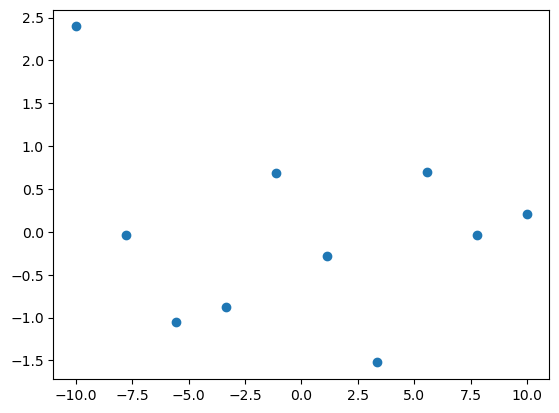

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

n_total = 10 #number of data points
n_for_testing = 2 #number of data points we will use from here as a test set

x_min = -10
x_max = 10
x = np.linspace(-10,10,n_total)

np.random.seed(146)
y = np.random.normal(size=n_total)
plt.scatter(x,y)
plt.show()

In [2]:
data = pd.DataFrame(columns=['x','y'])
data['x'] = x
data['y'] = y

#np.random.seed(48)
idx_test = np.random.choice(n_total, n_for_testing)

In [3]:
data_test = data.iloc[idx_test]
data_test

,x,y
0,-10.000000,2.396479
3,-3.333333,-0.881304


In [4]:
data = data.drop(index=idx_test)
data

,x,y
1,-7.777778,-0.038103
2,-5.555556,-1.053523
4,-1.111111,0.688067
5,1.111111,-0.284121
6,3.333333,-1.524334
7,5.555556,0.696851
8,7.777778,-0.031495
9,10.000000,0.207307


Next, I'll do a something called a polynomial regression (another type of linear regression).  The equation we're fitting here looks like:

$$y = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3 + \cdots + \beta_p x^p$$

So, even though there's a single variable, we're essentially creating more variables by considering higher powers of $x$.

In [5]:
from sklearn.preprocessing import PolynomialFeatures as PF
p = PF(degree=7)

X_poly = p.fit_transform(data['x'].values.reshape(-1,1))
X_poly[0]

array([ 1.00000000e+00, -7.77777778e+00,  6.04938272e+01, -4.70507545e+02,
        3.65950312e+03, -2.84628021e+04,  2.21377350e+05, -1.72182383e+06])

In [6]:
from sklearn.linear_model import LinearRegression as LR
lin_reg = LR()
lin_reg.fit(X_poly, data['y'])
lin_reg.score(X_poly, data['y'])

1.0

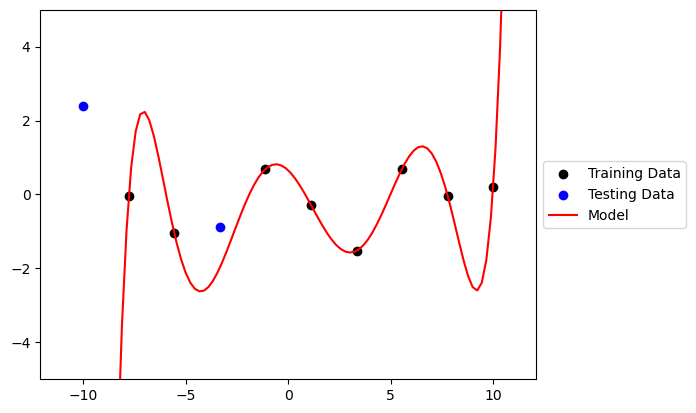

In [7]:
# In order to plot the curve, compute it

# The range of x values I want to plot
x_range = np.linspace(x_min*1.1, x_max*1.1, 100)
# Compute the powers of x, to plug into the model
x_range_poly = p.fit_transform(x_range.reshape(-1,1))
# Compute the y values, for the x values above
y_pred = lin_reg.predict(x_range_poly)


plt.scatter(data['x'], data['y'], label='Training Data', color='k')
plt.scatter(data_test['x'], data_test['y'], label='Testing Data', color='blue')
plt.plot(x_range, y_pred, color='r', label='Model')
plt.legend(bbox_to_anchor=[1,0.5], loc='center left')
plt.ylim([-5,5])
plt.show()

In [ ]:
X_test_poly = p.fit_transform(data_test['x'].values.reshape(-1,1))
y_test_pred = lin_reg.predict(X_test_poly)
y_test_pred

In [ ]:
lin_reg.score(X_test_poly, data_test['y'])

Is that even possible???

## Test train split

In [ ]:
#Let's make a new set of fake data
n = 10
np.random.seed(210)
x = np.random.normal(size=(n,1))
noise_strength = 0.2
noise = np.random.normal(scale=noise_strength, size=(n,1))*100
y = 100 + 200*x + noise
plt.scatter(x,y, label='Original data', color='k')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [11]:
from sklearn.model_selection import train_test_split as tts
#use random state 201

features_train, target_train, features_test, target_test = tts(x, y, test_size=0.2, shuffle=True, random_state=201)
features_train

array([  7.77777778,  -3.33333333,   5.55555556,   1.11111111,
        -1.11111111,  -7.77777778,  10.        , -10.        ])

In [12]:
#fit model, score on train
from sklearn.linear_model import LinearRegression as LR
lr = LR()

lr.fit(features_train.reshape(1, -1), target_train.reshape(1, -1))
lr.score(features_train.reshape(1, -1), target_train.reshape(1, -1))

/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


nan

In [ ]:
#score on test

In [ ]:
x_range = [min(x), max(x)]
y_pred = lin_reg.predict(x_range)
plt.scatter(Xtrain, ytrain, label='Training Data', color='k')
plt.scatter(Xtest, ytest, label='Testing Data', color='blue')
plt.plot(x_range, y_pred, color='r', label='Model')
plt.legend(bbox_to_anchor=[1,0.5], loc='center left')
plt.show()

In [ ]:
#do it again with random state 146


In [ ]:
x_range = [min(x), max(x)]
y_pred = lin_reg.predict(x_range)
plt.scatter(Xtrain, ytrain, label='Training Data', color='k')
plt.scatter(Xtest, ytest, label='Testing Data', color='blue')
plt.plot(x_range, y_pred, color='r', label='Model')
plt.legend(bbox_to_anchor=[1,0.5], loc='center left')
plt.show()

# k fold validation

Let's implement K-fold validation. As usual, there is a library that will make the coding a little easier for us. Let's look at a small fake data set so you can get an idea of what is going on. Then we will apply this to the concrete data.

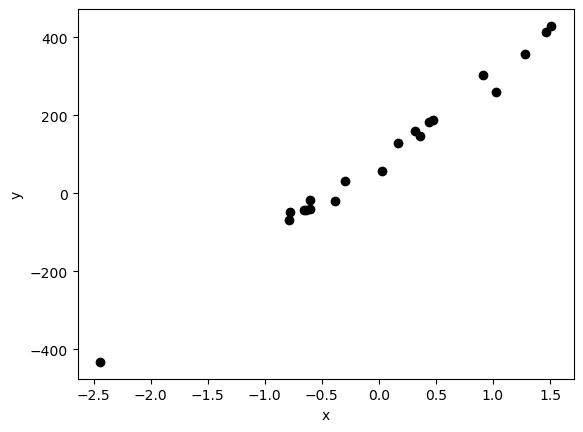

In [2]:
#Let's make a new set of fake data
n = 20
np.random.seed(210)
x= np.random.normal(size=(n,1))
noise_strength = 0.2
noise = np.random.normal(scale=noise_strength, size=(n,1))*100
y = 100 + 200*x + noise
plt.scatter(x,y, label='Original data', color='k')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [3]:
from sklearn.model_selection import KFold

In [4]:
kf = KFold(n_splits = 10, random_state=146, shuffle=True)
print(kf.split(x)) # returns generator

<generator object _BaseKFold.split at 0x7fa0b1329120>


In [7]:
#Write the full code step by step
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression as LR
lr = LR()

kf = KFold(n_splits = 10, random_state=146, shuffle=True)
scores = []

for idxTrain, idxTest in kf.split(x):
    Xtrain = x[idxTrain]
    Xtest = x[idxTest]
    ytrain = y[idxTrain]
    ytest = y[idxTest]

    # build the model
    lr.fit(Xtrain, ytrain)
    test_score = lr.score(Xtest, ytest)
    train_score = lr.score(Xtrain, ytrain)
    print(f"train score: {train_score}\t test score: {test_score}")

train score: 0.9869419497779562	 test score: 0.9851864739022598
train score: 0.9917304895685571	 test score: 0.9664594978599711
train score: 0.9911731711614887	 test score: 0.9783348389599285
train score: 0.9905855482957518	 test score: 0.7784956709988456
train score: 0.9935989974431435	 test score: 0.5015827287533763
train score: 0.9906891628196538	 test score: 0.9984395745681859
train score: 0.9900048089485345	 test score: 0.9904587086891804
train score: 0.9906736924458613	 test score: 0.9918437602836133
train score: 0.9907269881560179	 test score: 0.9790892279945117
train score: 0.9924960267431597	 test score: 0.8123516383840855


In [ ]:
min_r2 = min(min(test_scores), min(train_scores))
max_r2 = 1

n_bins = 15
my_bins = np.linspace(min_r2, max_r2, n_bins+1)

plt.hist(train_scores, label='Training Scores', color='blue', bins=my_bins, alpha=0.5, rwidth=0.95)
plt.hist(test_scores, label='Testing Scores', color='red', bins=my_bins, alpha=0.5, rwidth=0.95)
plt.legend()
plt.show()
print(f'Average for train: {np.mean(train_scores):.2f}')
print(f'Average for test: {np.mean (test_scores):.2f}')

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(train_scores, test_scores, alpha=0.5, ec='k', s = 80)
plt.xlabel('Training Score', fontsize=14)
plt.ylabel('Testing Score', fontsize=14)
plt.xlim([0,1])
#plt.ylim([min(test_scores), 1])
plt.show()

## What if we want/need to scale the data?

For the sake of this example, we will consider a small fake data set. It only two predictors. Reasons for scaling data for regression (even though not required for OLS) will be discussed in the next section of this module. 

Suppose we started out with 10 observations and they are already partitioned into training and test sets (this is hard-coded artifically here).

In [ ]:
ex_Xtrain = np.array([[56,5], [53,3], [94,4], [78,8],[15,5], [34,4], [53,5], [44,4]])
ex_Ytrain = np.array([51, 51, 95, 82, 16, 29, 55, 49])
ex_Xtest = np.array([[98, 6], [53,4]])
ex_Ytest = np.array([81,38])

In [ ]:
lin_reg = LR()
lin_reg.fit(ex_Xtrain, ex_Ytrain)
lin_reg.score(ex_Xtrain, ex_Ytrain)

In [ ]:
lin_reg.score(ex_Xtest, ex_Ytest)

In [ ]:
lin_reg.predict([[25,2]])

In [ ]:
lin_reg.predict(ex_Xtest)

In [ ]:
from sklearn.preprocessing import StandardScaler as SS
#this will be weird and we will need to figure out what we did wrong and fix it

ss = SS()
ex_Xtrain_s = ss.fit_transform(ex_Xtrain)
ex_Xtest_s = ss.fit_transform(ex_Xtest)
lin_reg.fit(ex_Xtrain_s, ex_Ytrain)
lin_reg.score(ex_Xtrain_s, ex_Ytrain) 

In [ ]:
ss.fit(ex_Xtrain)
lin_reg.predict(ss.transform([[25,2]])) ####WHAT?????

In [ ]:
lin_reg.score(ex_Xtest_s, ex_Ytest) #Huh?

In [ ]:
#Let's try scaling again